<a href="https://colab.research.google.com/github/kavehkarimadini/ARC_101_Tensorflow_Zero2Hero/blob/main/GRU_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout,GRU
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [2]:
# Step 1: Load and preprocess the data
# Assuming a CSV file with columns "Date" and "Demand"
data = pd.read_csv('/content/ChargingRecords.csv', parse_dates=['StartDay'], index_col='StartDay').sort_values(by='StartDay')

In [3]:
filtered_data = data.loc[:,'Demand']

In [4]:
filtered_data

,Demand
StartDay,
2021-09-30,20.36
2021-09-30,22.30
2021-09-30,22.14
2021-09-30,47.00
2021-09-30,30.40
...,...
2022-09-30,27.09
2022-09-30,42.93
2022-09-30,9.50


In [5]:
daily_data = filtered_data.resample('D').mean()

In [145]:
demand = daily_data.values.reshape(-1, 1)

In [28]:
# Normalize the data
scaler = MinMaxScaler()
demand_scaled = scaler.fit_transform(demand)

In [146]:
# Define a function to create sequences for LSTM
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length])
        y.append(data[i + sequence_length])
    return np.array(X), np.array(y)

In [204]:
# Set sequence length and create sequences
sequence_length = 1  # Using 30 days of data to predict the next day
X, y = create_sequences(demand, sequence_length)

In [205]:
X.shape

(365, 1, 1)

In [213]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=False)

In [214]:
# Step 2: Build the LSTM model
model = Sequential([
    GRU(30, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    GRU(30, activation='relu', return_sequences=False),
    Dense(15, activation='relu'),
    Dense(1)
])

In [215]:
model.compile(optimizer='adam', loss='mse')

In [216]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=30,
    batch_size=32,
    # callbacks=[early_stopping],
    verbose=1
)

Epoch 1/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - loss: 302.5906 - val_loss: 304.4357
Epoch 2/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 292.8692 - val_loss: 289.7336
Epoch 3/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 273.2391 - val_loss: 269.5922
Epoch 4/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 257.2022 - val_loss: 240.6320
Epoch 5/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 224.1519 - val_loss: 198.0847
Epoch 6/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 179.1815 - val_loss: 140.0171
Epoch 7/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 120.6338 - val_loss: 72.2648
Epoch 8/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 55.7586 - val_loss: 17.1342
Epoch 9/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 11.1028 - val_loss: 2.1772
Epoch 10/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.6356 - val_loss: 4.8934
Epoch 11/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.2449 - val_loss: 2.0272
Epoch 12/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6

In [217]:
# Step 4: Evaluate the model
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f"Train Loss: {train_loss:.4f}")
print(f"Test Loss: {test_loss:.4f}")

Train Loss: 2.5688
Test Loss: 1.7564


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 159ms/step


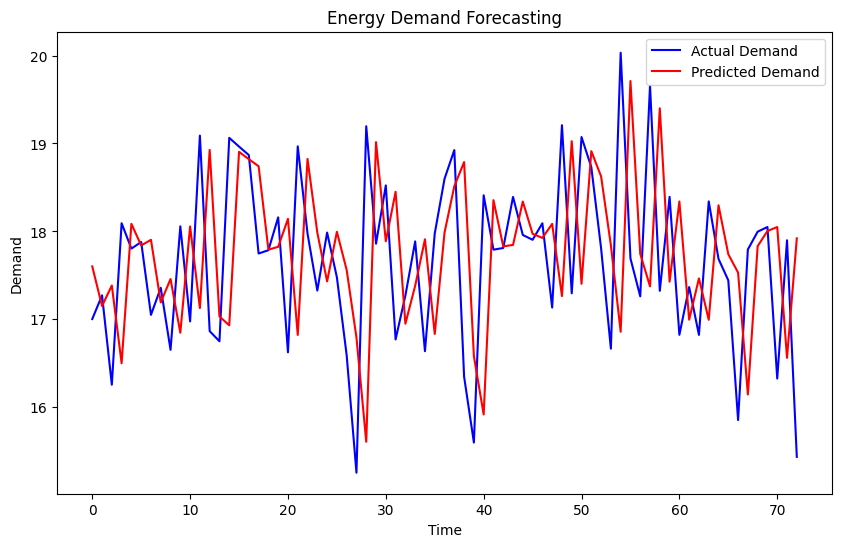

In [218]:
# Step 5: Make predictions and visualize results
y_pred = model.predict(X_test)
# y_pred_rescaled = scaler.inverse_transform(y_pred)
# y_test_rescaled = scaler.inverse_transform(y_test)

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Demand', color='blue')
plt.plot(y_pred, label='Predicted Demand', color='red')
plt.legend()
plt.title('Energy Demand Forecasting')
plt.xlabel('Time')
plt.ylabel('Demand')
plt.show()